## Task Overview:

Your goal is to analyze a dataset comprising 472 startup companies, focusing on both the startups and their founders. The aim is to identify and explain the factors that contribute to the success or failure of these startups.

## Dataset Information:

You will be working with a dataset that contains detailed information about various startups and their founders. A data dictionary is also available to clarify the variables included in the dataset. You are welcome to incorporate any additional relevant information to enhance your analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

Company_Name Dependent-Company Status year of founding  \
0     Company1                  Success          No Info   
1     Company2                  Success             2011   
2     Company3                  Success             2011   
3     Company4                  Success             2009   
4     Company5                  Success             2010   

  Age of company in years  Internet Activity Score  \
0                 No Info                     -1.0   
1                       3                    125.0   
2                       3                    455.0   
3                       5                    -99.0   
4                       4                    496.0   

     Short Description of company profile  \
0                      Video distribution   
1                                     NaN   
2                Event Data Analytics API   
3  The most advanced analytics for mobile   
4   The Location-Based Marketing Platform   

                              Industry of company Focus functions of company  \
0                                             NaN                  operation   
1          Market Research|Marketing|Crowdfunding           Marketing, sales   
2  Analytics|Cloud Computing|Software Development                 operations   
3                                Mobile|Analytics          Marketing & Sales   
4         Analytics|Marketing|Enterprise Software          Marketing & Sales   

                                           Investors  Employee Count  \
0  KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...             3.0   
1                                                NaN             NaN   
2  TechStars|Streamlined Ventures|Amplify Partner...            14.0   
3  Michael Birch|Max Levchin|Sequoia Capital|Keit...            45.0   
4  DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...            39.0   

   Employees count MoM change Has the team size grown Est. Founding Date  \
0                         0.0                      No                NaN   
1                         NaN                      No                NaN   
2                         0.0                      No          12/1/2011   
3                        10.0                      No          6/20/2009   
4                         3.0                      No           4/1/2010   

  Last Funding Date  Last Funding Amount Country of company  \
0         5/26/2013             450000.0      United States   
1               NaN                  NaN      United States   
2        10/23/2013            2350000.0      United States   
3         5/10/2012           10250000.0      United States   
4        12/11/2013            5500000.0      United States   

  Continent of company Number of Investors in Seed  \
0        North America                           2   
1        North America                           5   
2        North America                          15   
3        North America                           6   
4        North America                           7   

  Number of Investors in Angel and or VC  Number of Co-founders  \
0                                      0                      1   
1                                      0                      2   
2                                      0                      3   
3                                      0                      2   
4                                      0                      1   

   Number of of advisors  Team size Senior leadership Team size all employees  \
0                      2                            2                      15   
1                      0                            4                      20   
2                      0                            7                      10   
3                      0                            4                      50   
4                      1                            8                      40   

  Presence of a top angel or venture fund in previous round of investment  \
0  

In [4]:
nans = df.isna().sum()
nans[nans > 0]

Age of company in years                                                                                                  44
Internet Activity Score                                                                                                  65
Short Description of company profile                                                                                    149
Industry of company                                                                                                     124
Focus functions of company                                                                                               30
Investors                                                                                                               140
Employee Count                                                                                                          166
Employees count MoM change                                                                                              205
Has the 

The output shows columns with missing values in the dataset and their corresponding counts.

In [5]:
# Replace all 'No Info' values with np.nan
df.replace('No Info', np.nan, inplace=True)
# This column is object because there are 'unknown amount' values. We just replace them with np.nan
df.replace('unknown amount', np.nan, inplace=True)

In [6]:
print(df.dtypes)

Company_Name                                                                                                                          object
Dependent-Company Status                                                                                                              object
year of founding                                                                                                                      object
Age of company in years                                                                                                               object
Internet Activity Score                                                                                                              float64
Short Description of company profile                                                                                                  object
Industry of company                                                                                                                   object
Focus functio

In [7]:
# Convering dtypes of numeric data from object to float
converting_columns = ['year of founding', 'Age of company in years', 'Number of Investors in Seed', 'Number of Investors in Angel and or VC',
'Team size all employees', 'Number of of repeat investors', 'Years of education', 'Renowned in professional circle', 
'Experience in Fortune 100 organizations', 'Experience in Fortune 500 organizations', 'Experience in Fortune 1000 organizations',
'Number of Recognitions for Founders and Co-founders', 'Skills score', 'google page rank of company website', 
'Number of Direct competitors', 'Employees per year of company existence', 'Last round of funding received (in milionUSD)',
'Time to 1st investment (in months)', 'Avg time to investment - average across all rounds, measured from previous investment',
'Percent_skill_Entrepreneurship', 'Percent_skill_Operations', 'Percent_skill_Engineering', 'Percent_skill_Marketing',
'Percent_skill_Leadership', 'Percent_skill_Data Science', 'Percent_skill_Business Strategy', 'Percent_skill_Product Management', 
'Percent_skill_Sales', 'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting', 'Percent_skill_Finance',
'Percent_skill_Investment', 'Renown score']
df[converting_columns] = df[converting_columns].astype(float)

# Converting  Est. Founding Date and Last Funding Date from object to datetime
df["Est. Founding Date"] = pd.to_datetime(df["Est. Founding Date"])
df["Last Funding Date"] = pd.to_datetime(df["Last Funding Date"])

In [8]:
# Some columns contain multiple values that convey the same meaning, so we need to standardize these values.
replacements = {
    'Has the team size grown': {"yes": "Yes", "YES": "Yes"},
    'Cloud or platform based serive/product?': {"cloud": "Cloud"},
    'Local or global player': {"local": "Local", "LOCAL": "Local", "local  ": "Local",
                               "GLOBAL": "Global", "GLObaL": "Global", "global": "Global"},
    'Number of  Sales Support material': {"high": "High"}
}

for column, replace_dict in replacements.items():
    df[column].replace(replace_dict, inplace=True)

## Dealing with Missing Data

In [9]:
missing_values = df.isna().sum()
percent_missing = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'missing_values': missing_values,
    '% of Total': percent_missing
})
styled_missing_data = missing_data.style.background_gradient(cmap='Greys', low=0.3, high=0.9)
styled_missing_data

In [10]:
# We will drop columns with more than 20% missing values.
df = df.loc[:, missing_data['% of Total'] < 20]

In [11]:
# Delete some unimportant columns
df.drop(columns=['Company_Name', 'Focus functions of company'], inplace=True)

In [12]:
# Fill missing values in numeric and categorical columns
for col in df.columns[df.isna().any()]:
    if df[col].dtype in ['float64', 'int64']:
        # Calculate correlation with numeric columns only
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        corr_mean = df[numeric_cols].corrwith(df[col]).mean()
        df[col].fillna(df[col].mean() if corr_mean > 0.5 else df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

For numeric columns, it calculates the correlation with other numeric columns; if the average correlation is greater than 0.5, it fills missing values with the column's mean; otherwise, it uses the median. For categorical columns, it replaces missing values with the most frequent value (mode). This approach ensures that missing data is handled appropriately based on the nature of the columns.

## Encoding Categorical Variables

In [13]:
for col in df.select_dtypes(include='object').columns:
    print("-"*50)
    print(col)
    print(df[col].unique())
    print("-"*50)

--------------------------------------------------
Dependent-Company Status
['Success' 'Failed']
--------------------------------------------------
--------------------------------------------------
Has the team size grown
['No' 'Yes']
--------------------------------------------------
--------------------------------------------------
Country of company
['United States' 'India' 'Azerbaijan' 'Belgium' 'Bulgaria'
 'Czech Republic' 'Germany' 'Spain' 'France' 'United Kingdom' 'Canada'
 'Switzerland' 'Argentina' 'Italy' 'Singapore' 'Denmark' 'Finland'
 'Israel' 'Austria' 'Russian Federation' 'Estonia' 'Sweden']
--------------------------------------------------
--------------------------------------------------
Continent of company
['North America' 'Asia' 'Europe' 'South America']
--------------------------------------------------
--------------------------------------------------
Number of  Sales Support material
['Nothing' 'medium' 'low' 'High']
------------------------------------------

In [14]:
encoded_df = df.copy()

object_columns = encoded_df.select_dtypes(include='object')

target_encoder = TargetEncoder()

for col in object_columns:
    if len(encoded_df[col].unique()) == 2:
        dummies = pd.get_dummies(encoded_df[col], prefix='', dtype='int32')
        encoded_df[col] = dummies.iloc[:, 1]
    elif len(encoded_df[col].unique()) > 2:
        # Target Encoding for high-cardinality columns
        encoded_df[col] = target_encoder.fit_transform(encoded_df[col], encoded_df['Dependent-Company Status'])

encoded_df

Dependent-Company Status  year of founding  Age of company in years  \
0                           1            2010.0                      4.0   
1                           1            2011.0                      3.0   
2                           1            2011.0                      3.0   
3                           1            2009.0                      5.0   
4                           1            2010.0                      4.0   
5                           1            2010.0                      4.0   
6                           1            2011.0                      3.0   
7                           1            2010.0                      4.0   
8                           1            2011.0                      3.0   
9                           1            2013.0                      1.0   
10                          1            2011.0                      3.0   
11                          1            2010.0                      4.0   
12                          1            2010.0                      4.0   
13                          1            2008.0                      6.0   
14                          1            2010.0                      4.0   
15                          1            2008.0                      6.0   
16                          1            2010.0                      4.0   
17                          1            2009.0                      5.0   
18                          1            2002.0                     12.0   
19                          1            2010.0                      4.0   
20                          1            2010.0                      4.0   
21                          1            2005.0                      9.0   
22                          1            2012.0                      2.0   
23                          1            2009.0                      5.0   
24                          1            2012.0                      2.0   
25                          1            2011.0                      3.0   
26                          1            2009.0                      5.0   
27                          1            2013.0                      1.0   
28                          1            2007.0                      7.0   
29                          1            2012.0                      2.0   
30                          1            2012.0                      2.0   
31                          1            2008.0                      6.0   
32                          1            2010.0                      4.0   
33                          1            2011.0                      3.0   
34                          1            2010.0                      4.0   
35                          1            2012.0                      2.0   
36                          1            2012.0                      2.0   
37                          1            2012.0                      2.0   
38                          1            2010.0                      4.0   
39                          1            2010.0                      4.0   
40                          1            2012.0                      2.0   
41                          1            2009.0                      5.0   
42                          1            2011.0                      3.0   
43                          1            2008.0                      6.0   
44                          1            2012.0                      2.0   
45                          1            2010.0                      4.0   
46                          1            2011.0                      3.0   
47                          1            2003.0                     11.0   
48                          1            2000.0                     14.0   
49                          0            2010.0                      4.0   
50                          1            2011.0                      3.0   
51                          1            2009.0      

The code creates a copy of the DataFrame `df` to encode categorical data. It applies one-hot encoding for binary columns and target encoding for high-cardinality columns, replacing the original values in `encoded_df` with the encoded results based on their relationship with the target variable, `Dependent-Company Status`.

## EDA

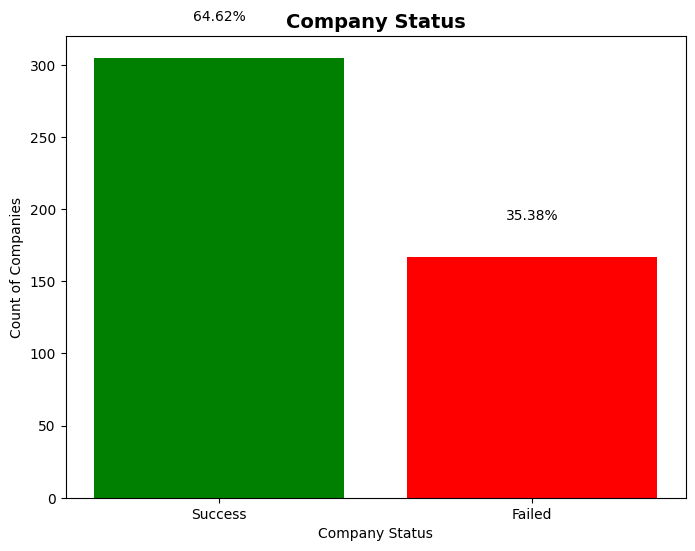

In [15]:
counts = df["Dependent-Company Status"].value_counts()
total = len(df)
percentages = (counts / total) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=['green', 'red'])

for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * total, 
             f'{pct:.2f}%', ha='center', va='bottom')

plt.title("Company Status", fontsize=14, fontweight='bold')
plt.xlabel("Company Status")
plt.ylabel("Count of Companies");

**Dependment company status:** *Failed companies represent 35.38% of the dataset, while successful companies account for 64.62%. This bar plot effectively illustrates the distribution of company statuses.*

## Correlation

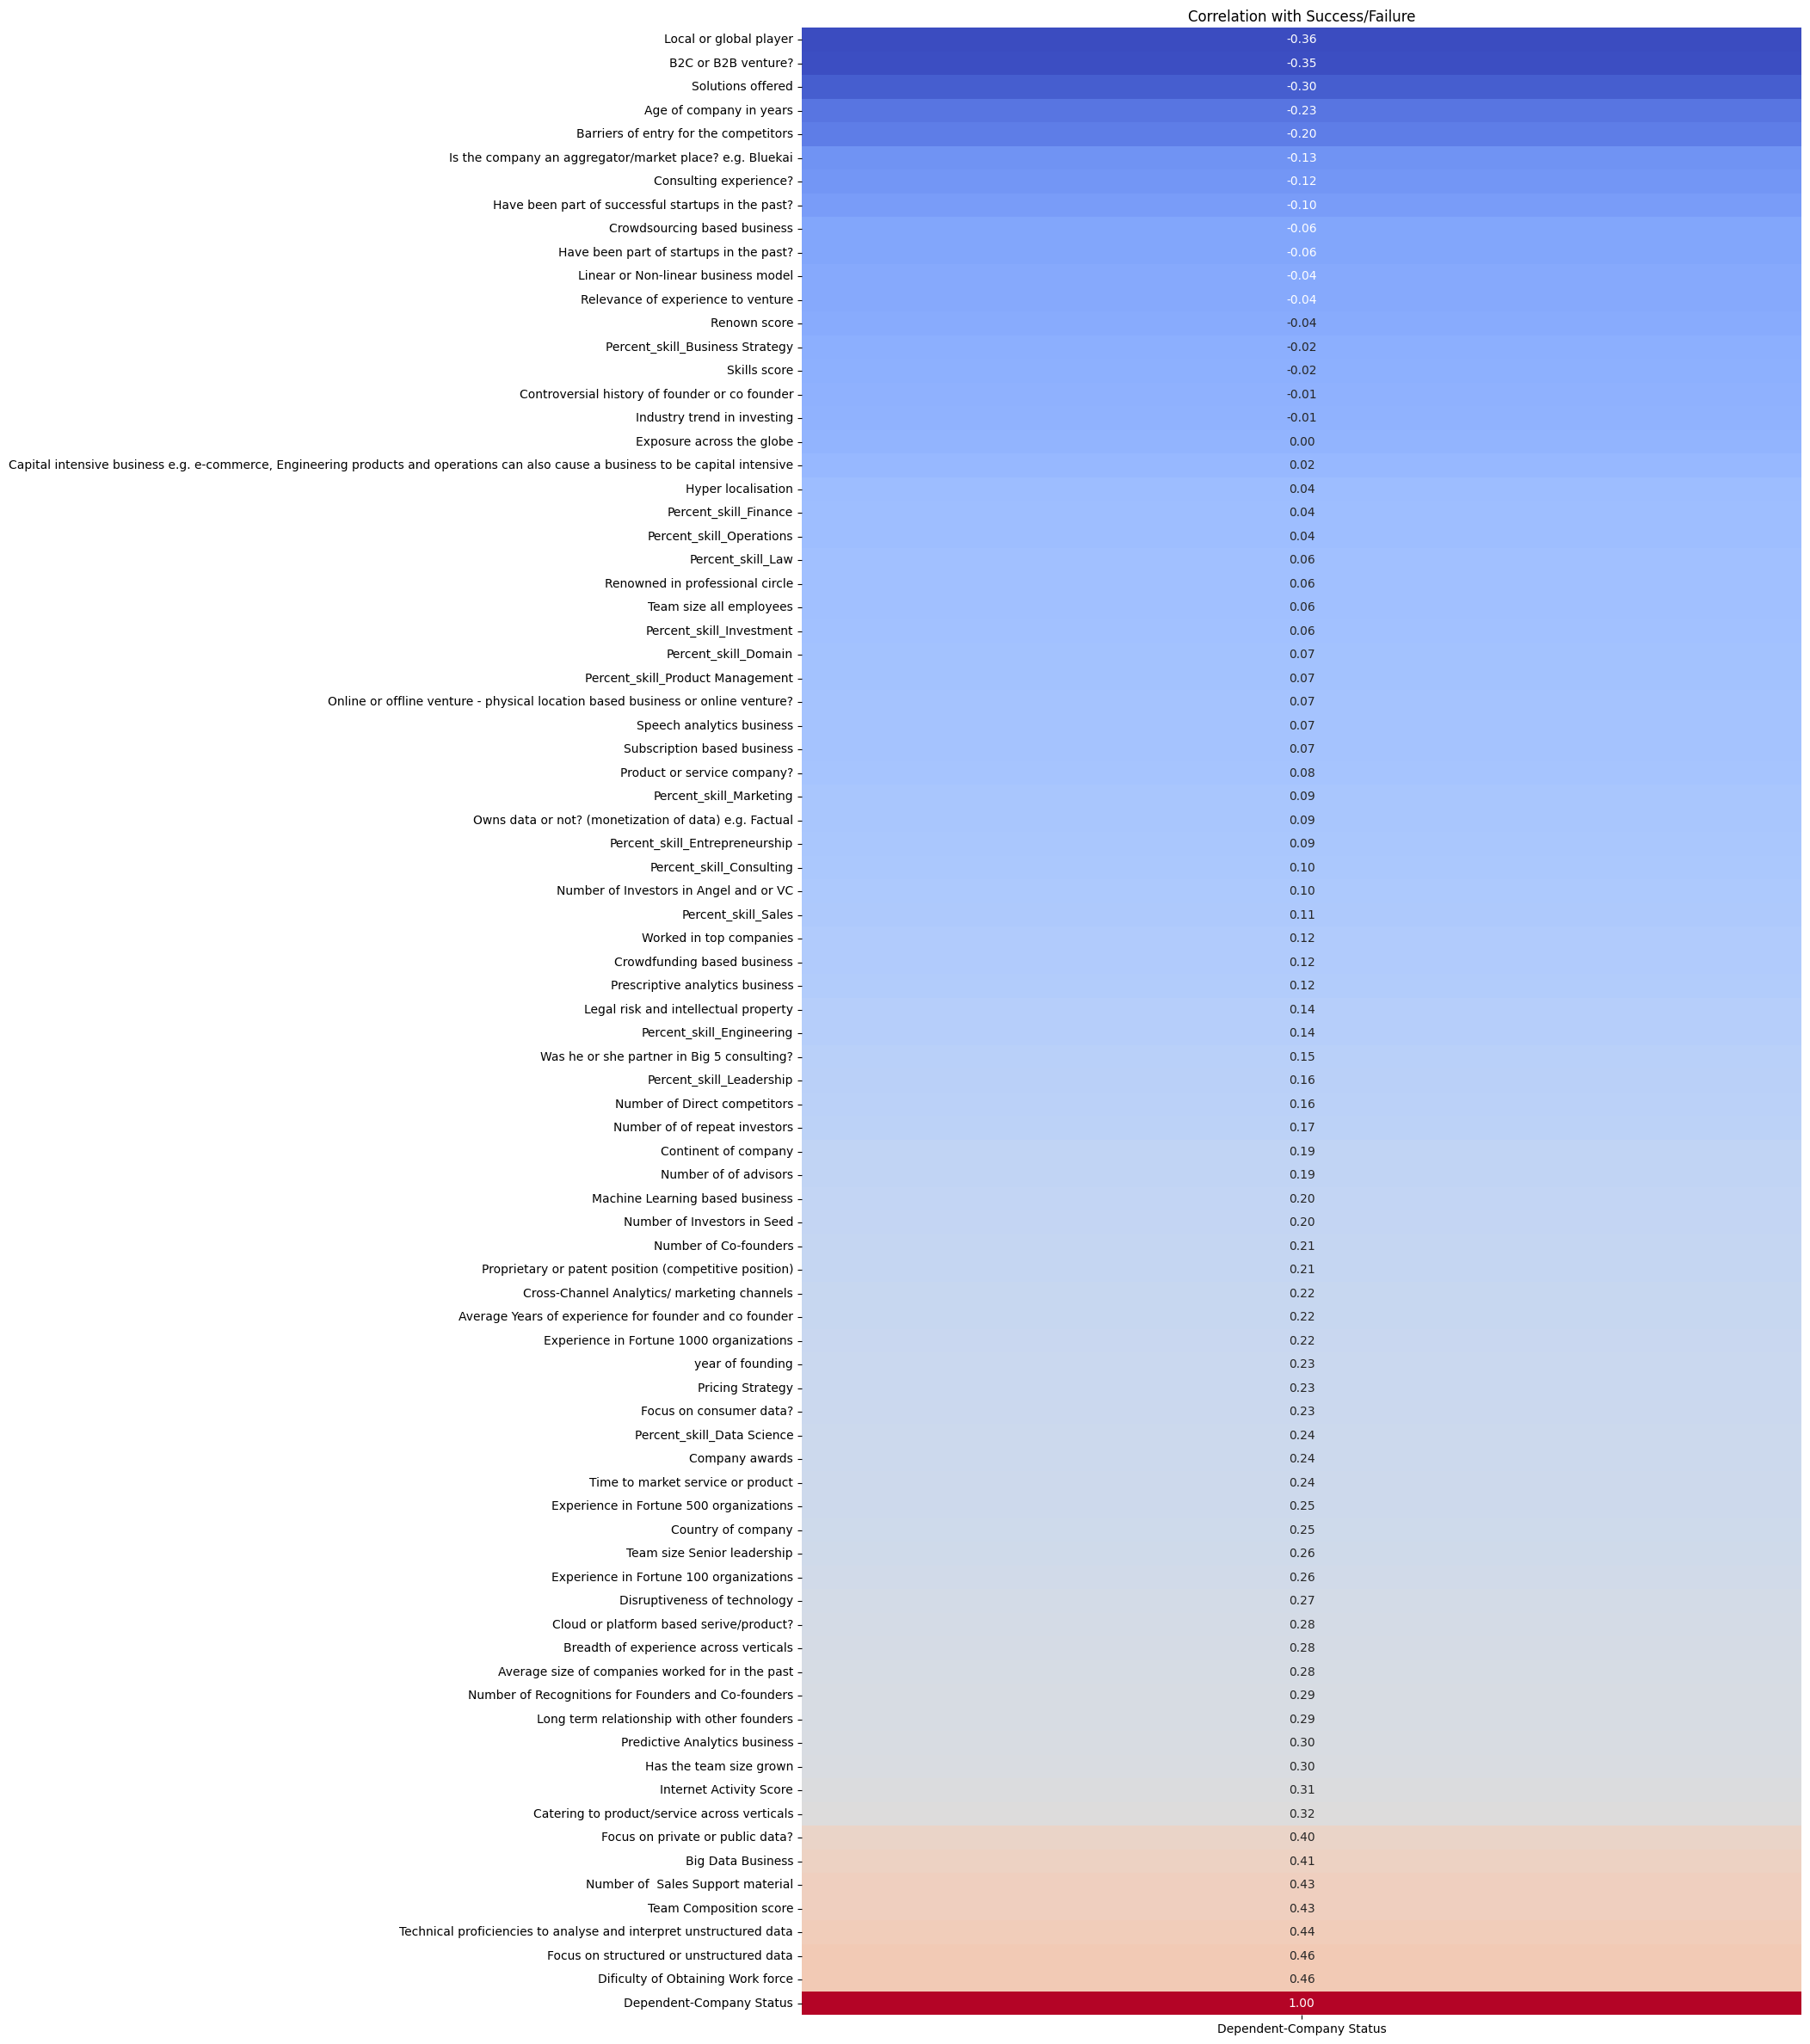

In [16]:
plt.figure(figsize=(15, 30))
sns.heatmap(
    encoded_df.corr()[['Dependent-Company Status']].sort_values(by='Dependent-Company Status'),
    annot=True, cmap='coolwarm', fmt=".2f", cbar=False
)
plt.title('Correlation with Success/Failure');

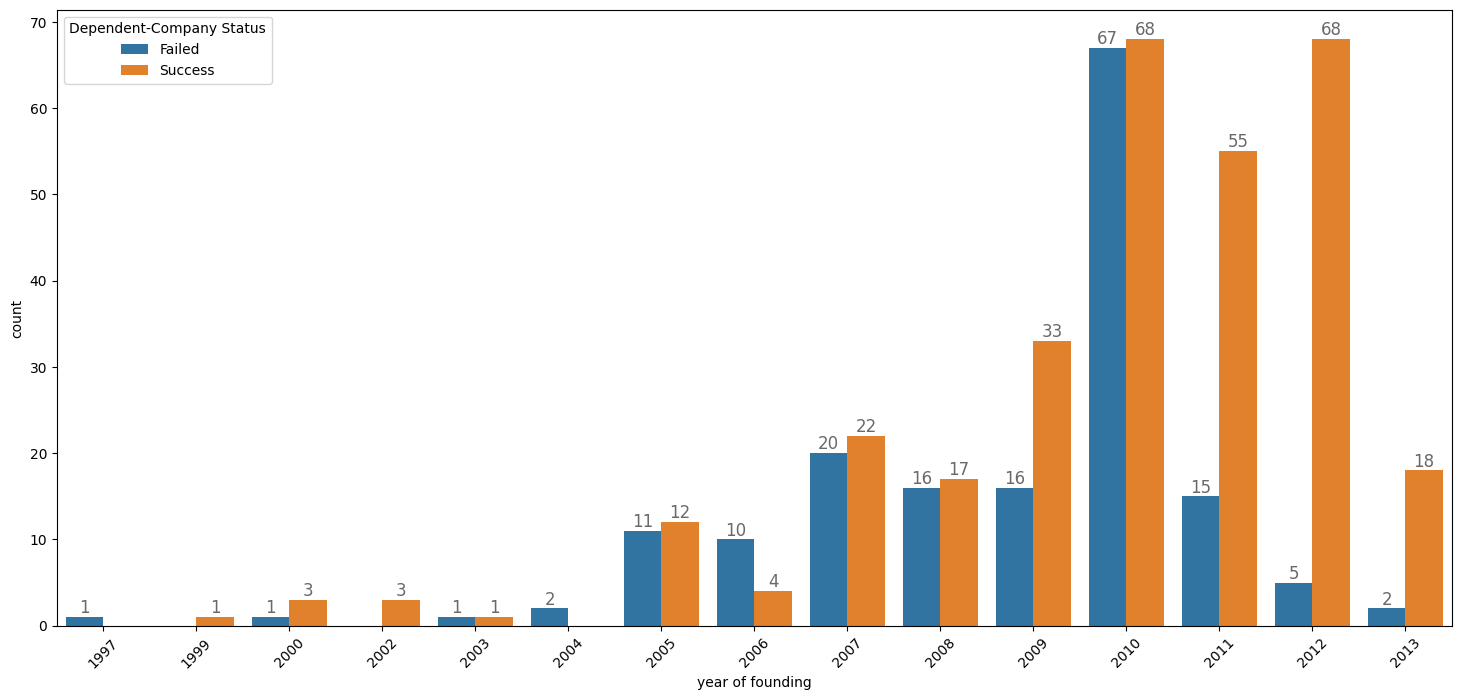

In [17]:
df['year of founding'] = df['year of founding'].astype(int)

plt.figure(figsize=(18, 8))
ax = sns.countplot(x='year of founding', hue='Dependent-Company Status', data=df)

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, color='dimgrey');

**Year of founding:** *This plot shows the number of companies founded each year, with separate bars for successful and failed companies. The highest number of companies were founded in 2010, 2011, and 2012.*

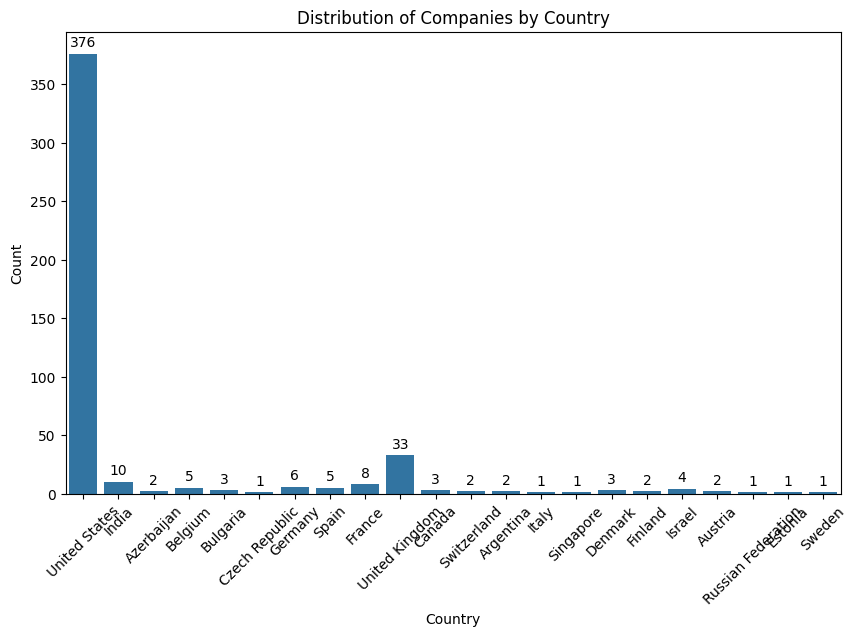

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Country of company", data=df)

plt.title("Distribution of Companies by Country")
plt.xlabel("Country")
plt.ylabel("Count")

plt.xticks(rotation=45)

ax.bar_label(ax.containers[0], label_type='edge', padding=3);

**Distribution of Companies by Country:** *The dataset mainly includes companies from the United States, with significant numbers from the United Kingdom and India. 
This distribution shows a global range of companies and points to opportunities in different regions.*

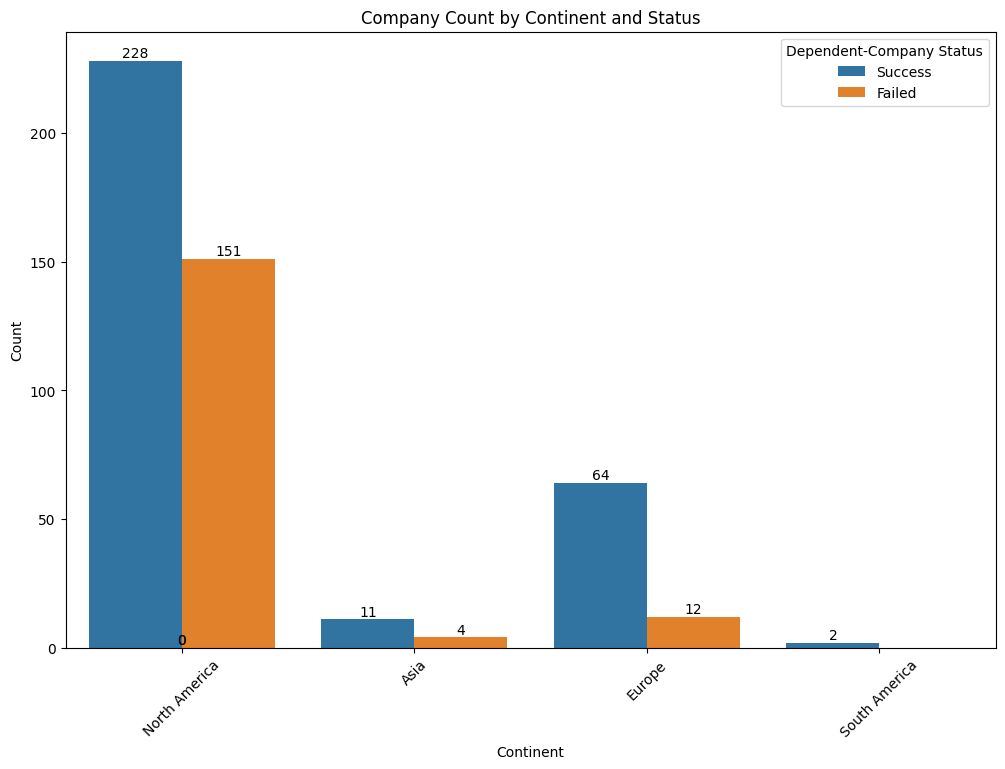

In [19]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Continent of company", hue="Dependent-Company Status", data=df)

plt.title("Company Count by Continent and Status")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)

for bar in ax.patches:
    height = bar.get_height()
    if not pd.isnull(height):
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{int(height)}', 
                ha='center', va='bottom');

**North America:** *Leads in both successful and failed startups, showing a strong startup scene.*

**Europe:** *Has many successful startups but also a high failure rate.*

**Asia:** *Fewer startups but a higher success rate, indicating growth potential.*

**South America:** *Few startups, but a notable number of successful ones, suggesting room for growth.*

**Summary:** *North America has a strong ecosystem, Europe has challenges, Asia is promising, and South America shows growth potential*.

## Gradient Boosting Feature Importance Analysis
*We will use the Gradient Boosting algorithm to calculate feature importance scores. In this context, important features are those that reduce impurity, leading to better node splits and enhanced predictive accuracy.*

### Steps: 
*1. Train a Gradient Boosting classifier on the training data.  
2. Extract feature importance scores from the trained model.  
3. Visualize the feature importance scores to identify the most significant features.*

In [20]:
X = encoded_df.drop(columns=['Dependent-Company Status'])
y = encoded_df['Dependent-Company Status']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
model = GradientBoostingClassifier(n_estimators=15,max_features='sqrt',random_state=42)

In [25]:
model.fit(X_train,y_train)

GradientBoostingClassifier(max_features='sqrt', n_estimators=15,
                           random_state=42)

In [26]:
feat_import = model.feature_importances_
feat_import

array([8.78426231e-02, 7.98536575e-03, 1.17453760e-01, 9.79369228e-03,
       8.29118440e-03, 0.00000000e+00, 4.89094394e-02, 0.00000000e+00,
       2.46882638e-03, 0.00000000e+00, 5.64222873e-03, 6.71519348e-03,
       6.27742292e-03, 6.61380505e-02, 0.00000000e+00, 6.12305721e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14641631e-02, 1.47863397e-02, 1.04068562e-03,
       5.54531814e-02, 0.00000000e+00, 2.35511448e-02, 0.00000000e+00,
       5.84545788e-03, 0.00000000e+00, 4.41201550e-03, 0.00000000e+00,
       6.36693689e-03, 1.61460547e-02, 0.00000000e+00, 0.00000000e+00,
       5.07655909e-02, 0.00000000e+00, 0.00000000e+00, 1.54947894e-04,
       0.00000000e+00, 1.40213379e-02, 2.59269628e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.73513945e-03, 1.70879068e-02,
       0.00000000e+00, 1.33421600e-03, 7.03231609e-02, 1.56945467e-02,
       5.82464447e-02, 2.71014142e-02, 0.00000000e+00, 0.00000000e+00,
      

In [27]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

Importance
year of founding                                      0.087843
Age of company in years                               0.007985
Internet Activity Score                               0.117454
Has the team size grown                               0.009794
Country of company                                    0.008291
Continent of company                                  0.000000
Number of Investors in Seed                           0.048909
Number of Investors in Angel and or VC                0.000000
Number of Co-founders                                 0.002469
Number of of advisors                                 0.000000
Team size Senior leadership                           0.005642
Team size all employees                               0.006715
Number of of repeat investors                         0.006277
Number of  Sales Support material                     0.066138
Worked in top companies                               0.000000
Average size of companies worked for in the past      0.006123
Have been part of startups in the past?               0.000000
Have been part of successful startups in the past?    0.000000
Was he or she partner in Big 5 consulting?            0.000000
Consulting experience?                                0.000000
Product or service company?                           0.000000
Catering to product/service across verticals          0.011464
Focus on private or public data?                      0.014786
Focus on consumer data?                               0.001041
Focus on structured or unstructured data              0.055453
Subscription based business                           0.000000
Cloud or platform based serive/product?               0.023551
Local or global player                                0.000000
Linear or Non-linear business model                   0.005845
Capital intensive business e.g. e-commerce, Eng...    0.000000
Crowdsourcing based business                          0.004412
Crowdfunding based business                           0.000000
Machine Learning based business                       0.006367
Predictive Analytics business                         0.016146
Speech analytics business                             0.000000
Prescriptive analytics business                       0.000000
Big Data Business                                     0.050766
Cross-Channel Analytics/ marketing channels           0.000000
Owns data or not? (monetization of data) e.g. F...    0.000000
Is the company an aggregator/market place? e.g....    0.000155
Online or offline venture - physical location b...    0.000000
B2C or B2B venture?                                   0.014021
Average Years of experience for founder and co ...    0.000003
Exposure across the globe                             0.000000
Breadth of experience across verticals                0.000000
Relevance of experience to venture                    0.000000
Renowned in professional circle                       0.002735
Experience in Fortune 100 organizations               0.017088
Experience in Fortune 500 organizations               0.000000
Experience in Fortune 1000 organizations              0.001334
Number of Recognitions for Founders and Co-foun...    0.070323
Skills score                                          0.015695
Team Composition score                                0.058246
Dificulty of Obtaining Work force                     0.027101
Pricing Strategy                                      0.000000
Hyper localisation                                    0.000000
Time to market service or product                     0.000000
Long term relationship with other founders            0.013791
Proprietary or patent position (competitive pos...    0.000000
Barriers of entry for the competitors                 0.002402
Company awards                                        0.000000
Controversial history of founder or co founder        0.000000
Legal risk and intellectual property                  0.000000
Technical proficienc

In [28]:
top_15 = imp_feats.sort_values("Importance",ascending=False).head(15)
top_15

Importance
Internet Activity Score                               0.117454
Percent_skill_Data Science                            0.097312
year of founding                                      0.087843
Number of Recognitions for Founders and Co-foun...    0.070323
Technical proficiencies to analyse and interpre...    0.066552
Number of  Sales Support material                     0.066138
Team Composition score                                0.058246
Focus on structured or unstructured data              0.055453
Big Data Business                                     0.050766
Number of Investors in Seed                           0.048909
Dificulty of Obtaining Work force                     0.027101
Cloud or platform based serive/product?               0.023551
Experience in Fortune 100 organizations               0.017088
Renown score                                          0.016741
Predictive Analytics business                         0.016146

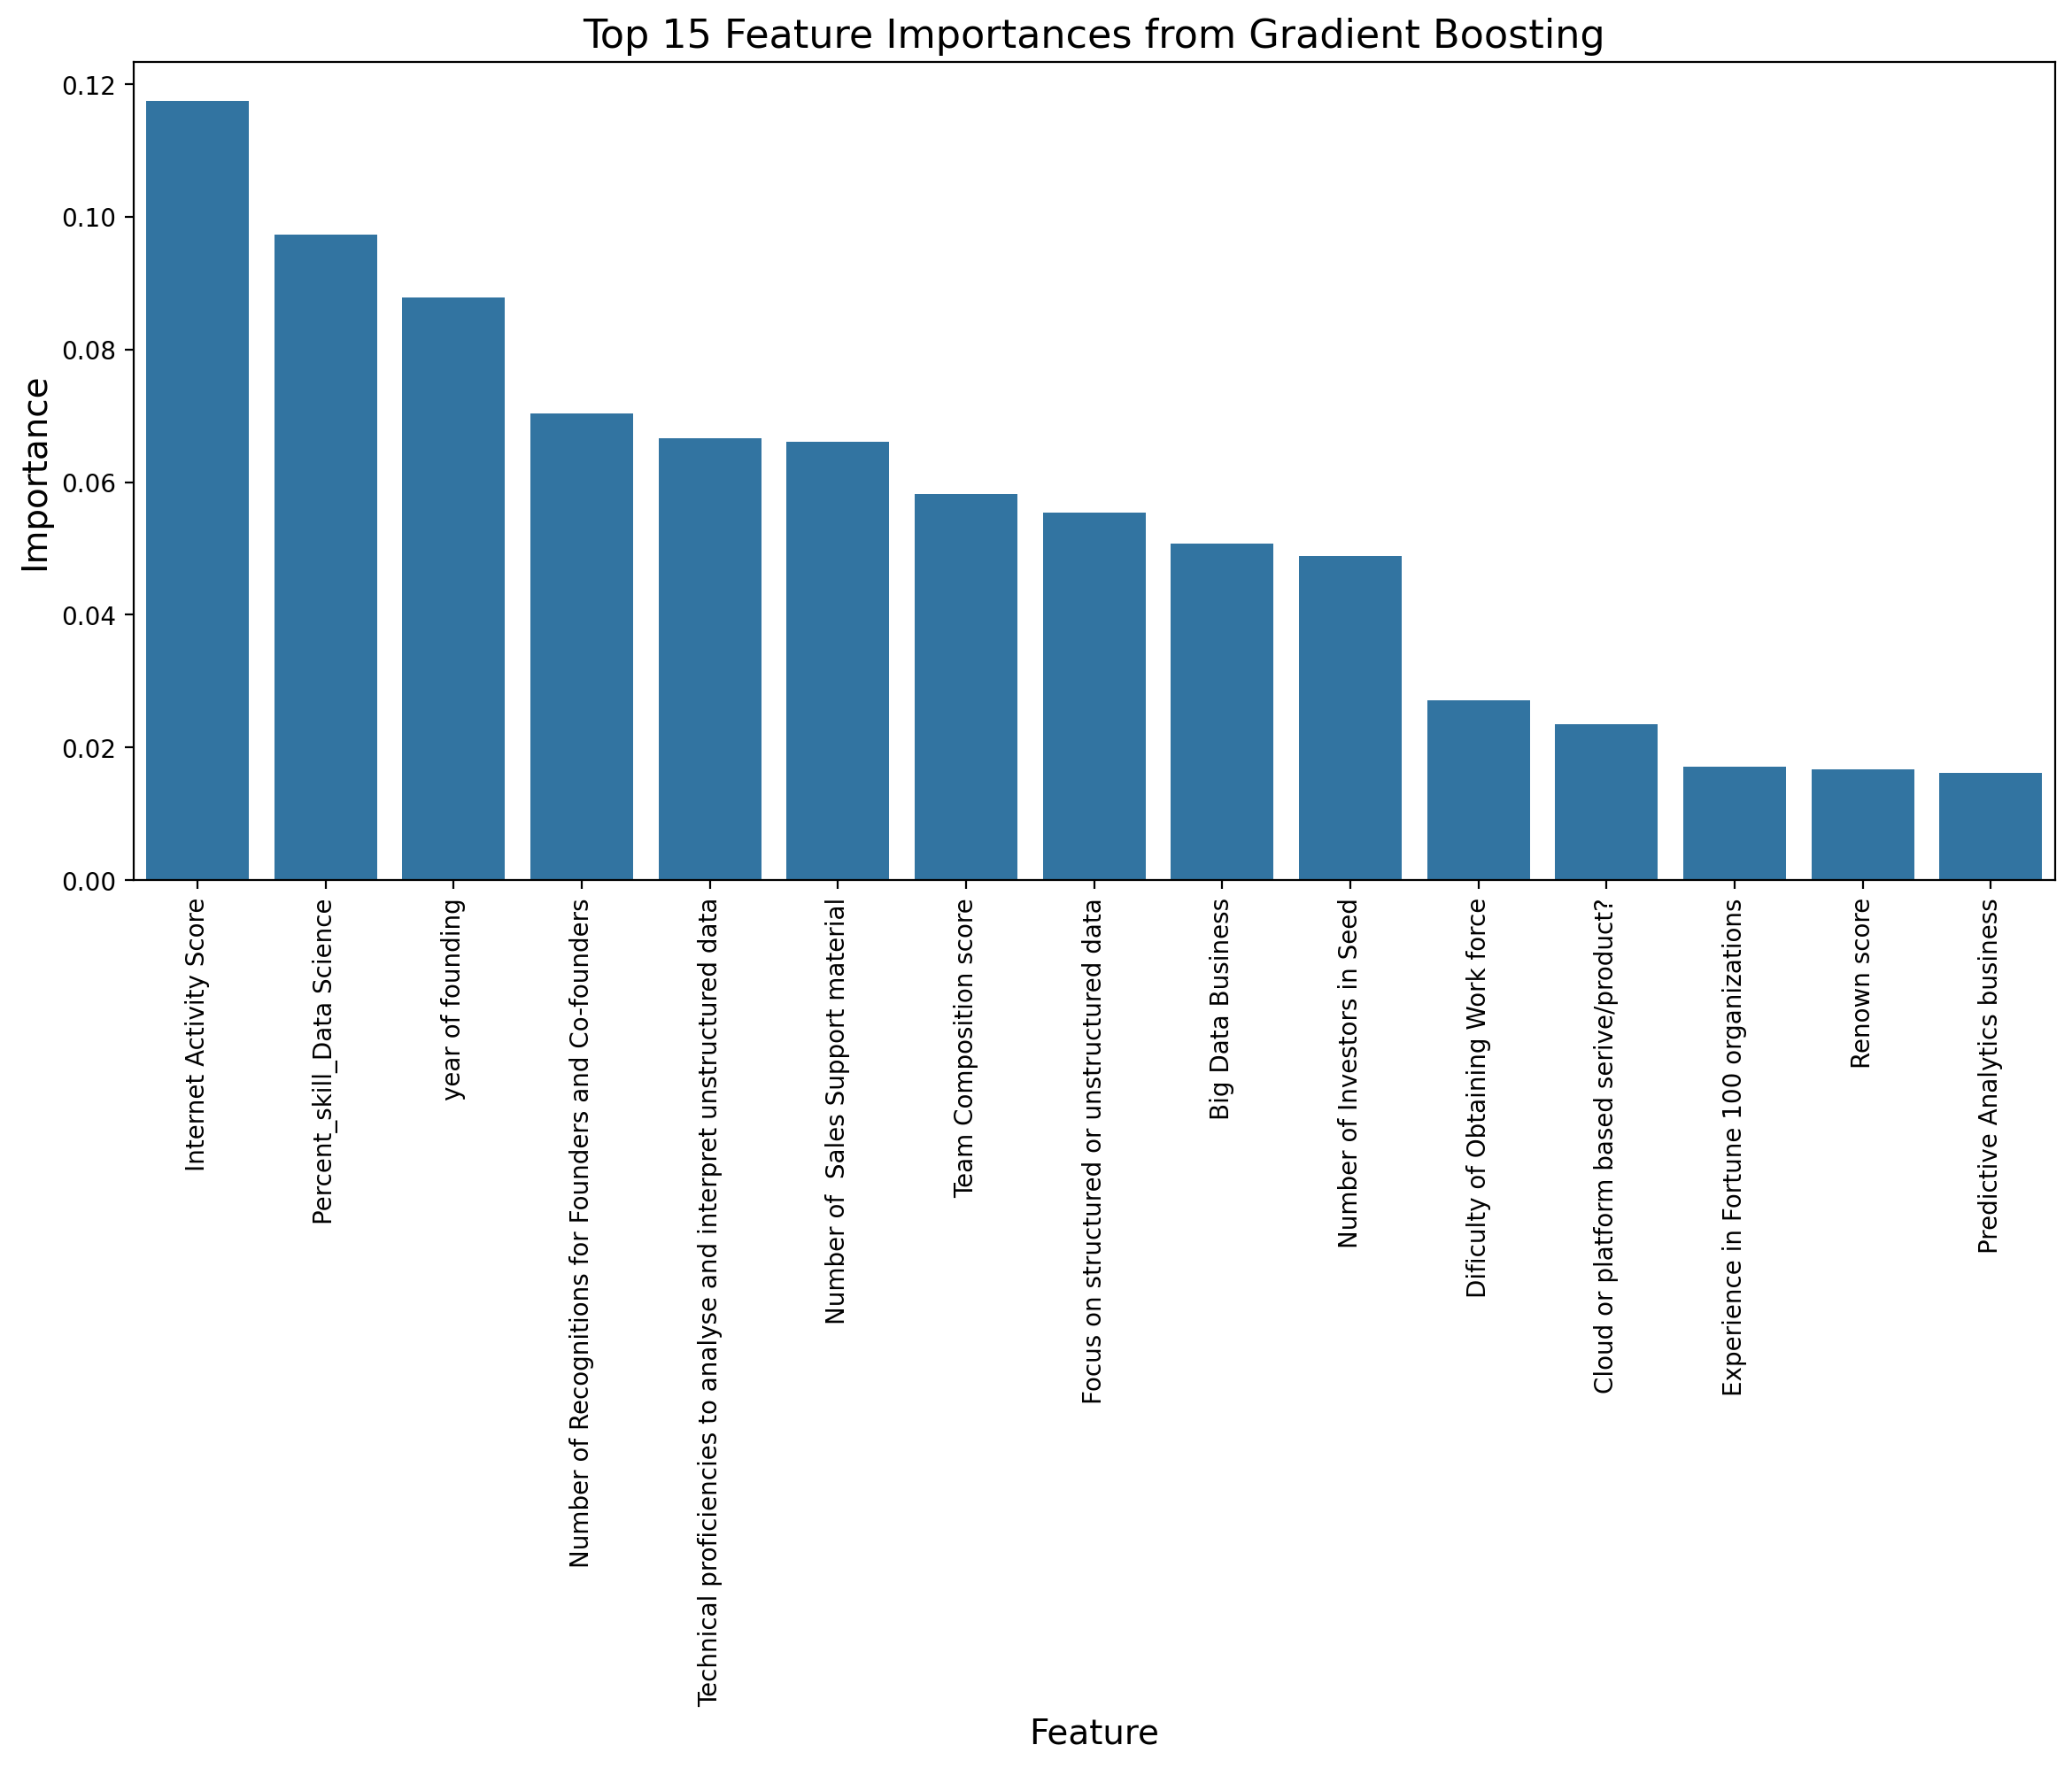

In [29]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=top_15,x=top_15.index,y='Importance')
plt.title('Top 15 Feature Importances from Gradient Boosting', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90);

*The barplot displays the top important features. 
Now, we’ll examine the correlations between these features and the Dependent-Company Status.
As shown, the majority have a linear relationship with the target variable.*

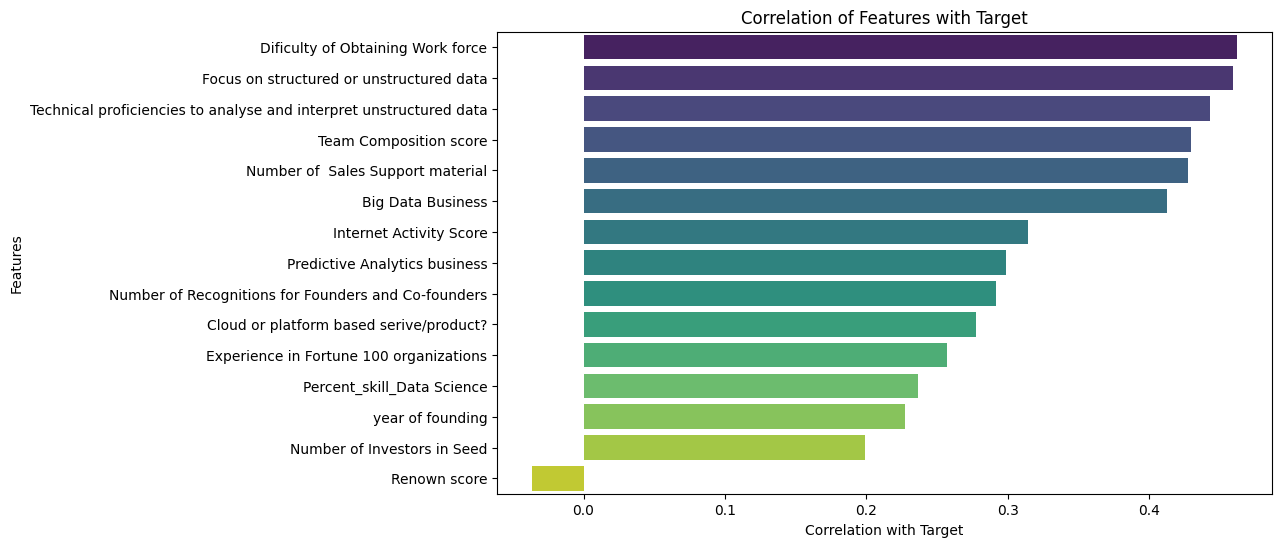

In [30]:
importnant_cols = top_15.index.tolist()
importnant_cols.append('Dependent-Company Status')

correlations = encoded_df[importnant_cols].corr()['Dependent-Company Status'].drop('Dependent-Company Status').sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.xlabel("Correlation with Target")
plt.ylabel("Features")
plt.title("Correlation of Features with Target");

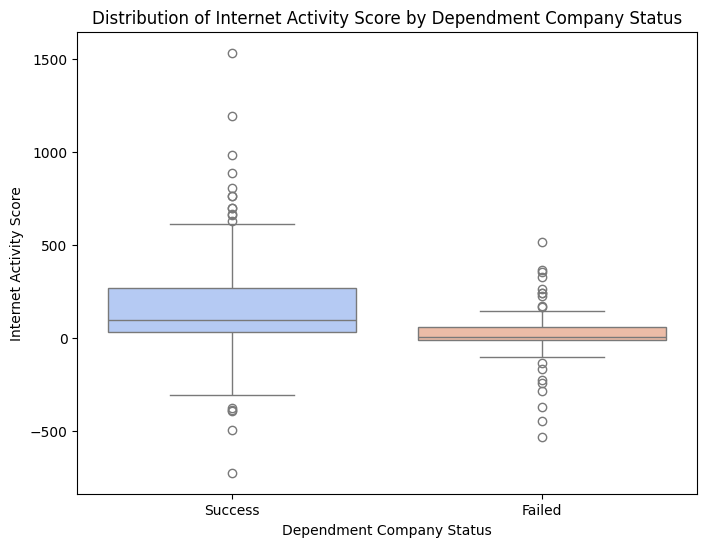

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dependent-Company Status', y='Internet Activity Score', data=df, palette='coolwarm')
plt.title('Distribution of Internet Activity Score by Dependment Company Status')
plt.xlabel('Dependment Company Status')
plt.ylabel('Internet Activity Score');

**The analysis shows a clear pattern:** *successful companies tend to have significantly higher Internet Activity Scores than those that failed. This is reflected in the higher mean and median scores among successful firms, as well as a broader range of scores, indicating more variation in online activity levels. These results suggest that maintaining a strong and diverse online presence may play an important role in a company's success.*

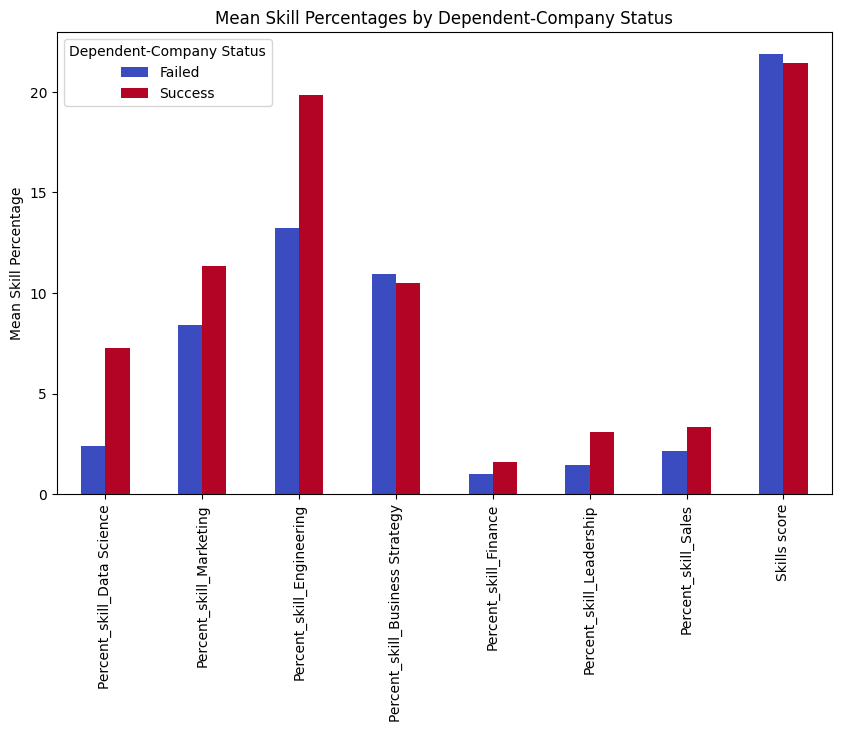

In [32]:
skills_cols = ['Percent_skill_Data Science', 'Percent_skill_Marketing', 'Percent_skill_Engineering', 
               'Percent_skill_Business Strategy', 'Percent_skill_Finance', 'Percent_skill_Leadership', 'Percent_skill_Sales', 'Skills score']

# Calculate the mean of skill columns grouped by 'Dependent-Company Status'
mean_skills = df.groupby('Dependent-Company Status')[skills_cols].mean()

# Plot the results
mean_skills.T.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.ylabel('Mean Skill Percentage')
plt.title('Mean Skill Percentages by Dependent-Company Status');

**Skill Percentages:** *The expertise and skillset of founders and co-founders, reflected in both individual areas and overall capability, are key factors influencing a company's success.*

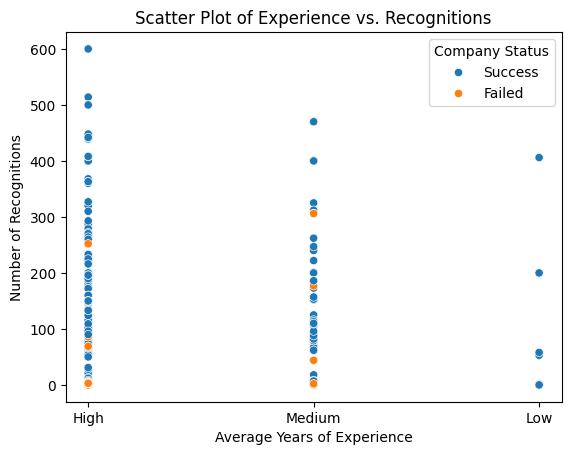

In [33]:
sns.scatterplot(data=df, 
                x='Average Years of experience for founder and co founder', 
                y='Number of Recognitions for Founders and Co-founders', 
                hue='Dependent-Company Status')
plt.title('Scatter Plot of Experience vs. Recognitions')
plt.xlabel('Average Years of Experience')
plt.ylabel('Number of Recognitions')
plt.legend(title='Company Status');

**The analysis of average years of experience for founders and co-founders**

**Low Experience:** *Companies with low average experience have no failures, with all classified as successful.*

**Medium Experience:** *In the medium experience range, success rates increase, with few failures. This suggests that moderate experience correlates with better outcomes.*

**High Experience:** *Companies with high average experience achieve the highest success rates. The number of failures decreases compared to the medium category, indicating that greater experience contributes positively to startup success.*

**Overall:** *The findings indicate that increased average years of experience among founders is associated with higher success rates and recognition, along with a decrease in failures.*

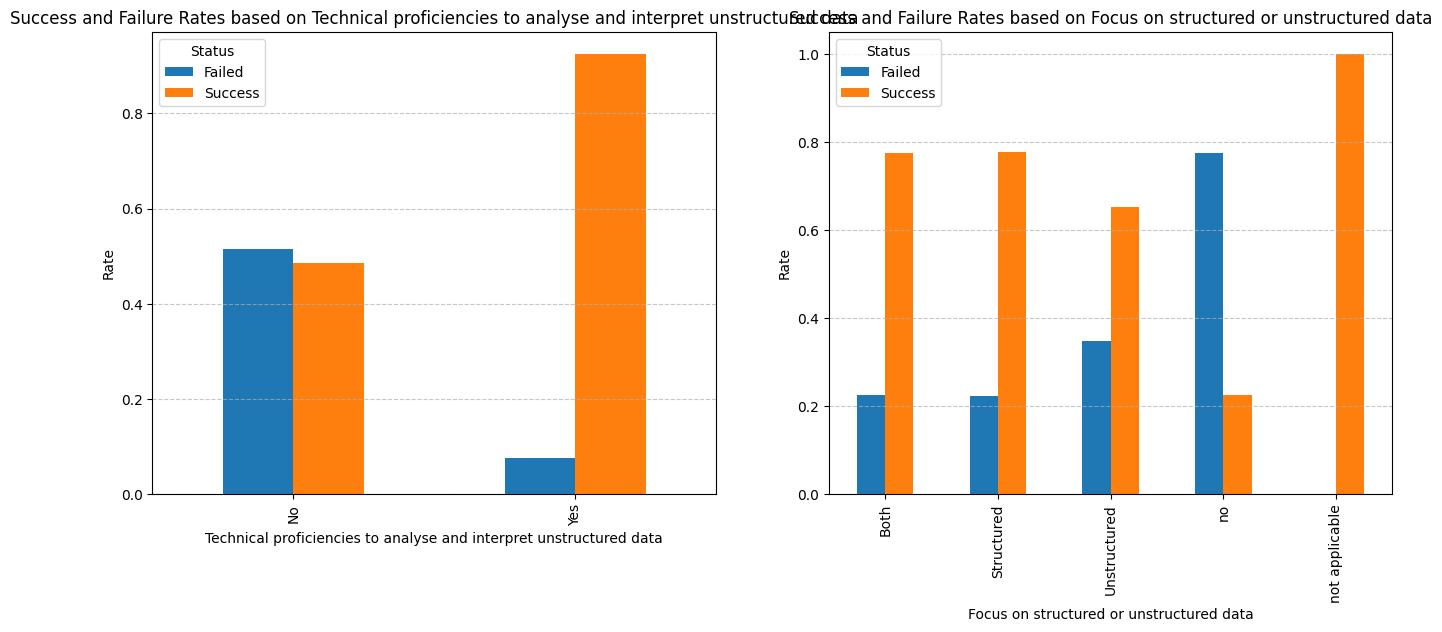

In [34]:
success_failure_rates = {
    'Technical proficiencies to analyse and interpret unstructured data': df.groupby('Technical proficiencies to analyse and interpret unstructured data')['Dependent-Company Status'].value_counts(normalize=True).unstack().fillna(0),
    'Focus on structured or unstructured data': df.groupby('Focus on structured or unstructured data')['Dependent-Company Status'].value_counts(normalize=True).unstack().fillna(0)
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot success and failure rates
for ax, (title, rates_df) in zip(axes, success_failure_rates.items()):
    rates_df.plot(kind='bar', ax=ax)
    ax.set_title(f'Success and Failure Rates based on {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Rate')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(title='Status');

**Technical Proficiencies:** *Companies proficient in analyzing unstructured data achieve higher success rates with few failures, whereas those without this proficiency experience more failures than successes*.

**Focus on Data Types:**

*Companies focusing on **both** structured and unstructured data show higher success rates than failures, with similar outcomes for **structured** data alone.
For those focusing only on **unstructured** data, successes are higher than failures, but overall success rates are lower compared to structured data.
Companies with **"not applicable"** status in this category exhibit only higher success rates.*

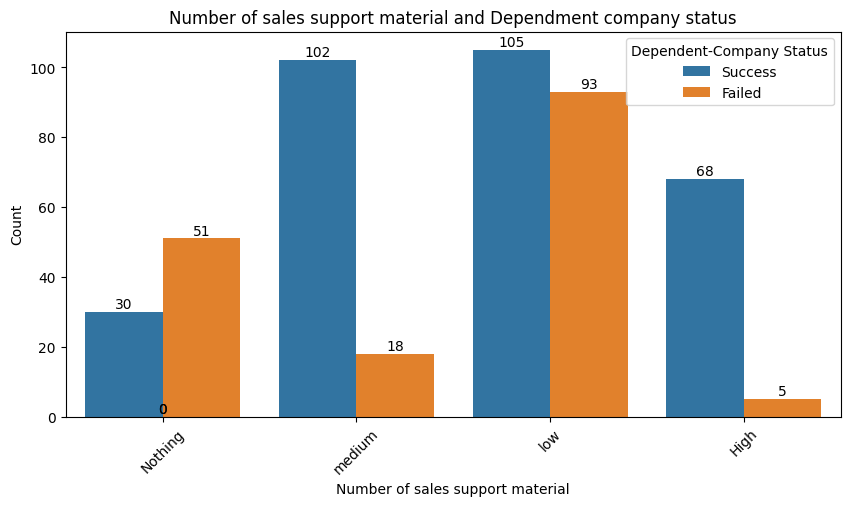

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Number of  Sales Support material", hue="Dependent-Company Status", data=df)

plt.title("Number of sales support material and Dependment company status")
plt.xlabel("Number of sales support material")
plt.ylabel("Count")
plt.xticks(rotation=45)

for bar in ax.patches:
    height = bar.get_height()
    if not pd.isnull(height):
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{int(height)}', 
                ha='center', va='bottom');

**Number of sales support material:** *The analysis shows that the companies with no sales support materials tend to fail more often, while those with medium and high support have higher success rates. Companies with low support have mixed results, indicating that having enough sales support is important for success.*

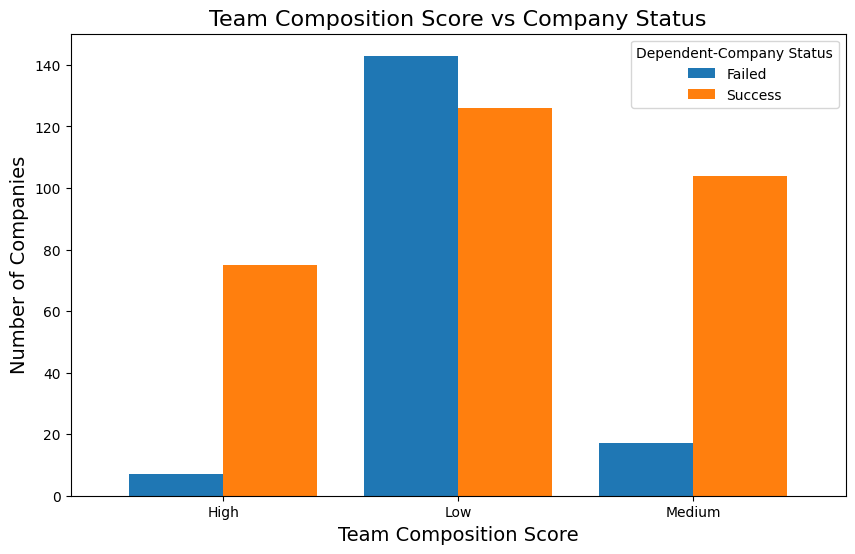

In [36]:
team_composition_counts = df.groupby(['Team Composition score', 'Dependent-Company Status']).size().unstack()

team_composition_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Team Composition Score vs Company Status', fontsize=16)
plt.xlabel('Team Composition Score', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(rotation=0);

**Team Composition Score:** *The analysis reveals that **high** team composition scores correlate with higher success rates, while **low** scores are associated with more failures. **Medium** scores demonstrate a favorable balance, indicating that better team composition generally leads to improved outcomes.*

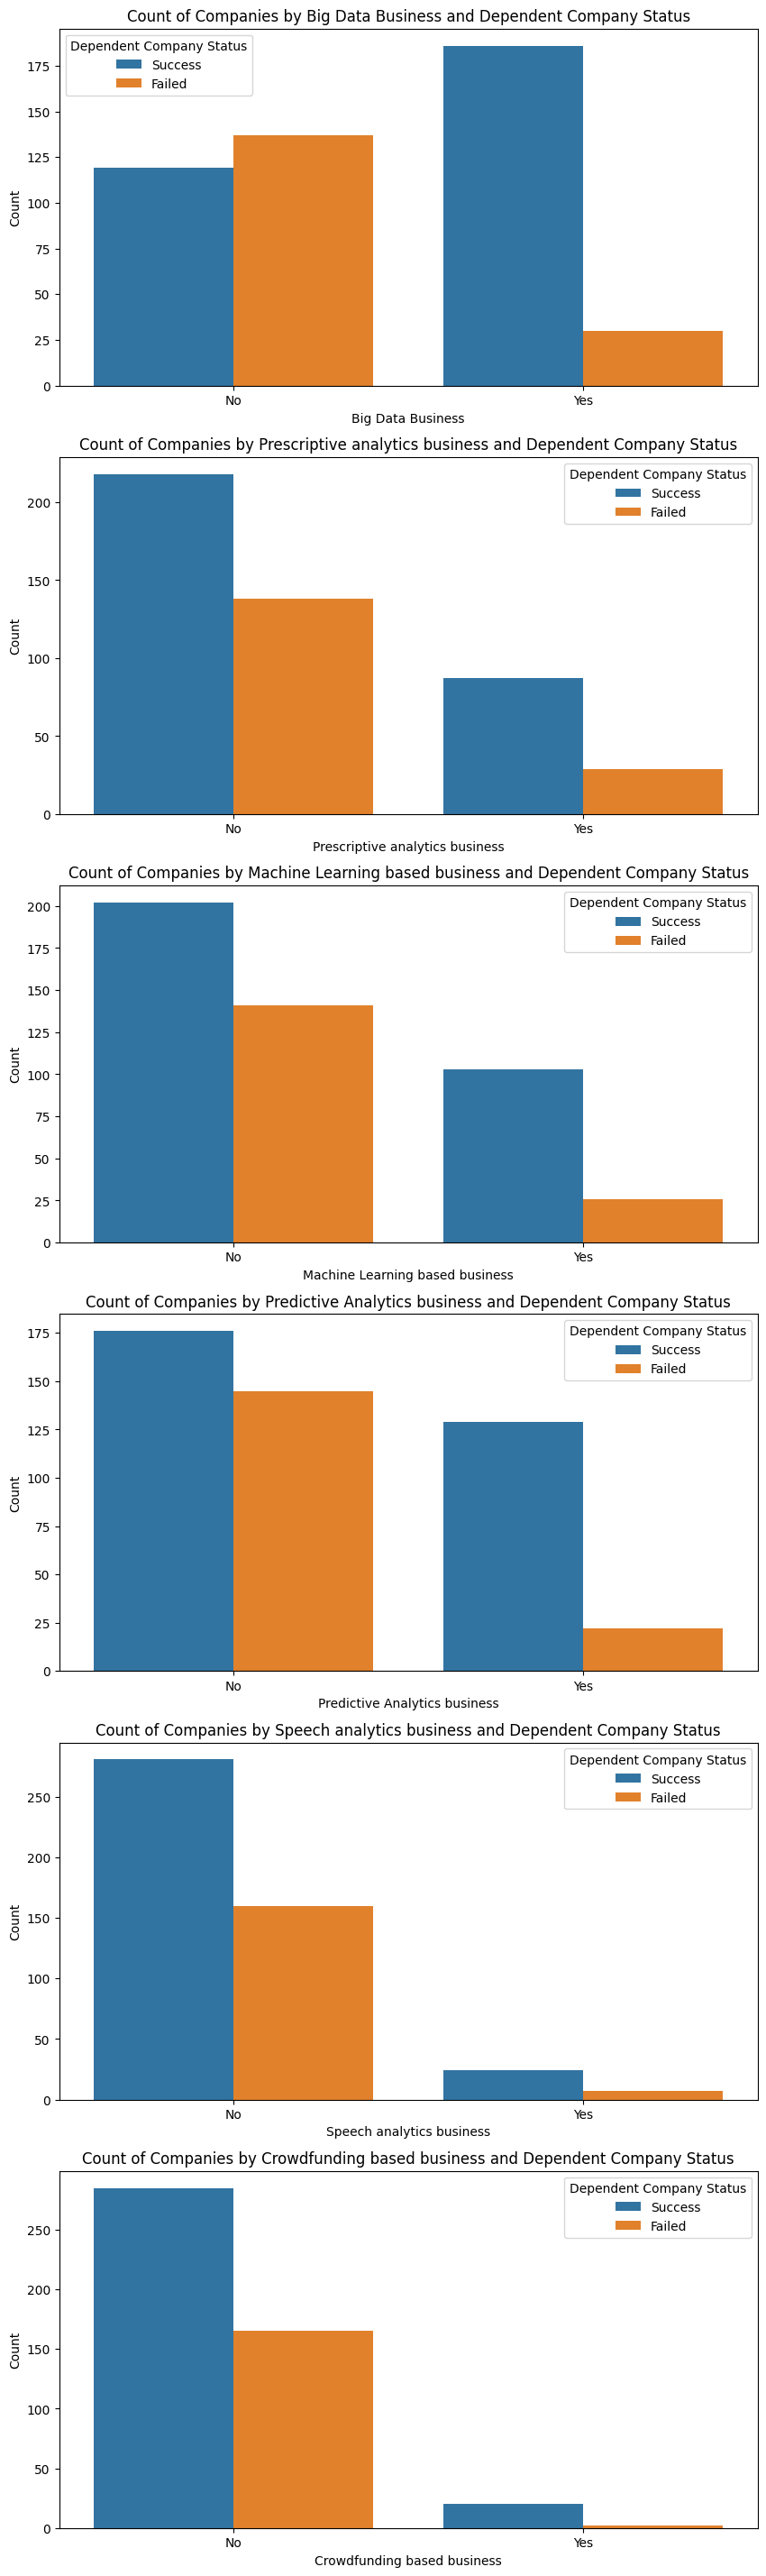

In [41]:
cols = ['Big Data Business', 'Prescriptive analytics business', 'Machine Learning based business',
        'Predictive Analytics business', 'Speech analytics business',  'Crowdfunding based business']

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(10, 6 * len(cols)))

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='Dependent-Company Status', ax=axes[i])
    axes[i].set_title(f'Count of Companies by {col} and Dependent Company Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Dependent Company Status')

**Business Types:** *The visualizations suggest that companies focused on Big Data tend to achieve higher success rates compared to other business types. This highlights the importance of utilizing Big Data technologies and analytics as a key factor in driving successful business outcomes.*

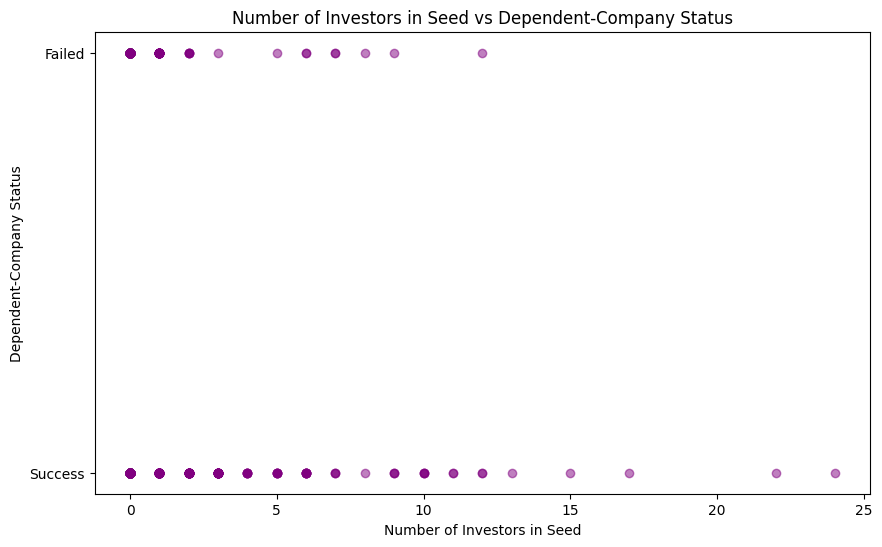

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Investors in Seed'], df['Dependent-Company Status'], alpha=0.5, c='purple')
plt.title('Number of Investors in Seed vs Dependent-Company Status')
plt.xlabel('Number of Investors in Seed')
plt.ylabel('Dependent-Company Status');

**Number of Investors in Seed:** *The scatter plot indicates a trend where companies with a higher number of investors in Seed tend to have a higher success rate. This highlights the importance of securing early-stage investment to fuel growth and increase the likelihood of success. However, the relationship between the number of investors and company success is not strictly linear, suggesting that other factors beyond investor count at the Seed stage also play a critical role in determining outcomes*

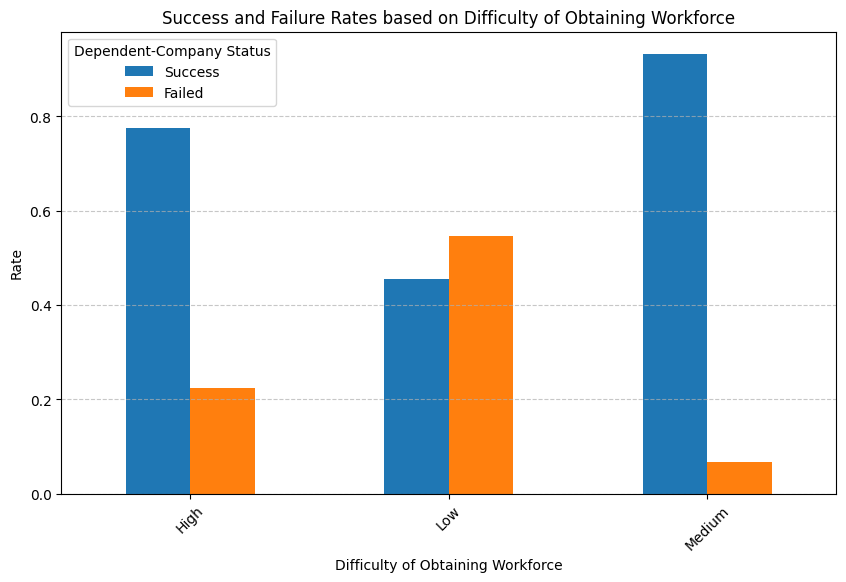

In [40]:
rates = df.groupby('Dificulty of Obtaining Work force')['Dependent-Company Status'].value_counts(normalize=True).unstack()

rates[['Success', 'Failed']].plot(kind='bar', figsize=(10, 6))

plt.title('Success and Failure Rates based on Difficulty of Obtaining Workforce')
plt.xlabel('Difficulty of Obtaining Workforce')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7);

**Dificulty of Obtaining Work force:** *Companies that face medium or high difficulty in finding a workforce tend to have higher success rates than those with low difficulty. This surprising result suggests that overcoming challenges in hiring may push companies to be more innovative and adaptable, which helps them succeed.*

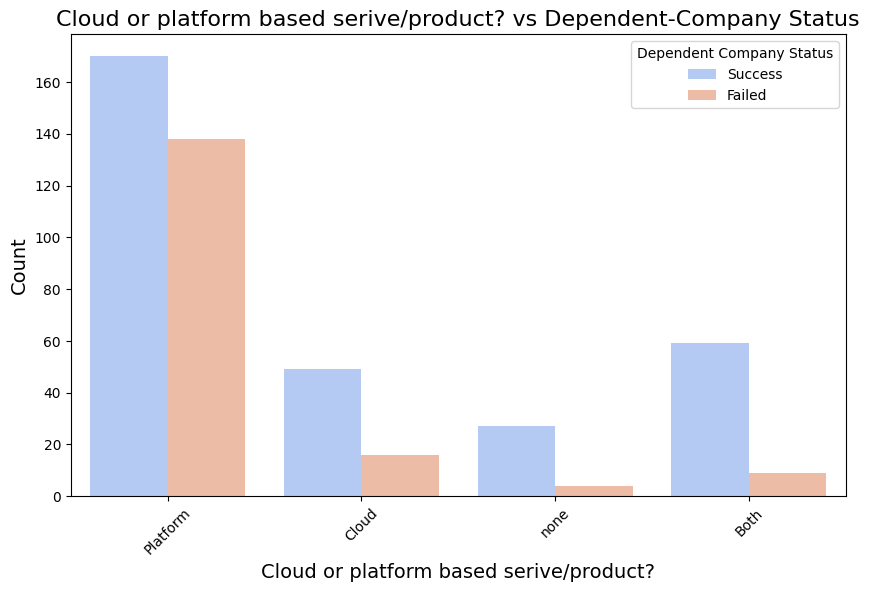

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cloud or platform based serive/product?', hue='Dependent-Company Status', palette='coolwarm')

plt.title('Cloud or platform based serive/product? vs Dependent-Company Status', fontsize=16)
plt.xlabel('Cloud or platform based serive/product?', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dependent Company Status');

**Cloud or platform based serive/product?:** *The analysis shows that companies offering either platform-based or cloud-based services tend to experience higher success rates compared to those that do not. Among them, platform-based companies show a relatively balanced outcome between success and failure, while cloud-based companies see a clear trend of more successes than failures. Additionally, companies providing both platform and cloud services also demonstrate a higher likelihood of success. On the other hand, companies offering neither cloud nor platform services generally face a higher risk of failure.*

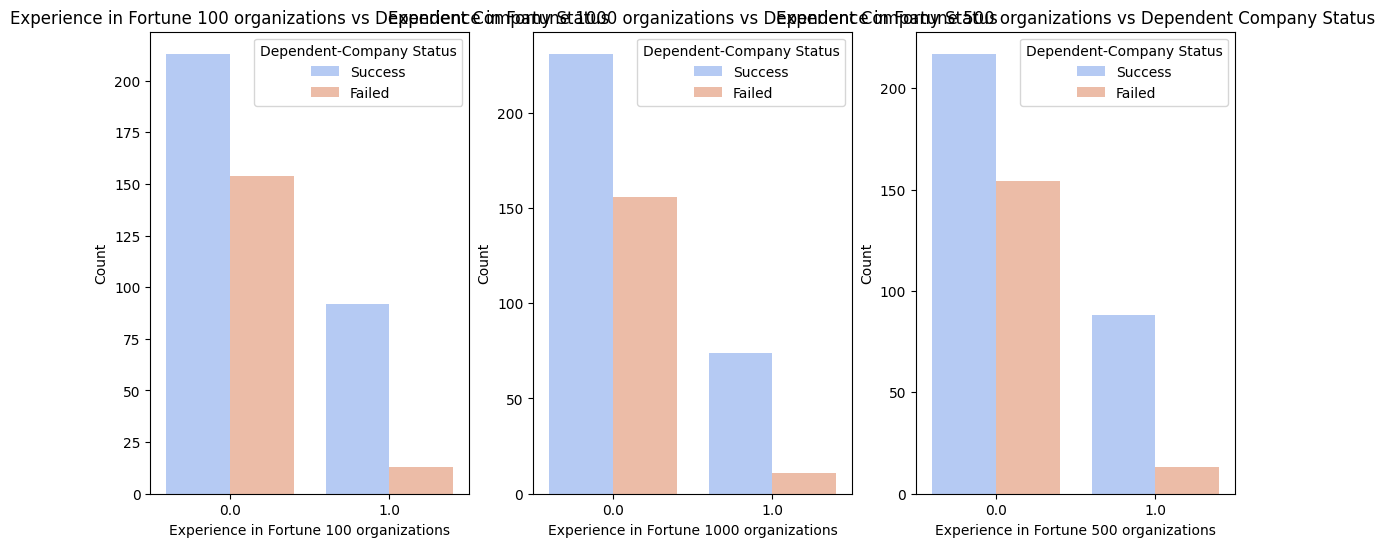

In [60]:
plt.figure(figsize=(14, 6))
cols = ['Experience in Fortune 100 organizations', 'Experience in Fortune 1000 organizations', 'Experience in Fortune 500 organizations']

for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, hue='Dependent-Company Status', palette='coolwarm')
    plt.title(f'{col} vs Dependent Company Status')
    plt.xlabel(col)
    plt.ylabel('Count');

**Experience in Fortune 100, 500, or 1000 organizations:** *Companies with experience in Fortune 100, 500, or 1000 organizations tend to have higher success rates compared to those without such experience. Particularly, the presence of Fortune organization experience correlates with fewer failures, indicating that exposure to large, well-established companies may provide valuable skills or networks that contribute to startup success.*

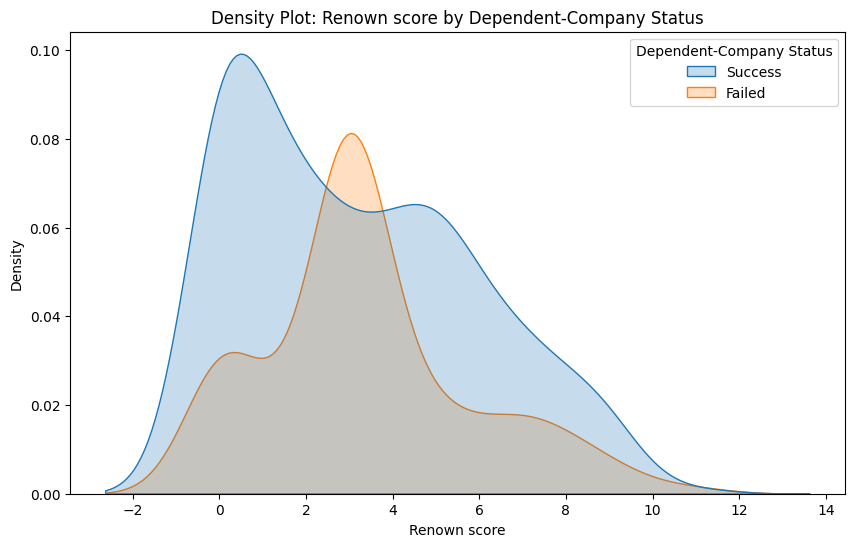

In [54]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Renown score', hue='Dependent-Company Status', fill=True)
plt.title('Density Plot: Renown score by Dependent-Company Status')
plt.xlabel('Renown score')
plt.ylabel('Density');

**Renown score:** *The density plot shows that startups classified as successful tend to have a wider range of *Renown scores*, with a peak around 2-3 and a more gradual decline as scores increase. In contrast, failed startups are concentrated around lower *Renown scores* (around 1-2), with very few reaching higher values. This suggests that a higher renown score is more common among successful startups, while failed startups tend to have founders with lower renown.*